## 2. K-Nearest Neighbors algorithm implemented in NumPy
The following code contains a kNN class and a demonstration on a simple generated dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mode

In [2]:
class Knn():

    def __init__(self, training_data, labels):
        """accepts an numpy array or training data and an array of integer labels"""
        self.training_data = training_data
        self.labels = labels

    def predict(self, test_data, k=3, p=2):
        """returns an array of class and probability for each data point, 
        accepts np array of data without labels"""

        results = []
        
        #for multple test points
        if test_data.ndim > 1:
            for td in test_data:
                
                #calculate distance of test data point from every training data point
                dist = ((abs(td - self.training_data) ** p).sum(axis=1))**(1/p)
                
                #find knn and get their corresponding labels
                index = np.argsort(dist)
                knn = self.labels[(index)][:k]
                
                #get test point predicted label and probability
                result = mode(knn)
                prob = float("{:.2f}".format(int(result[1]) / k))
                results.append((int(result[0]), prob))
        
        #for single test point
        else:                       
            dist = ((abs(td - self.training_data) ** p).sum(axis=1))**(1/p)
            index = np.argsort(dist)
            knn = self.labels[(index)][:k]
            result = mode(knn)
            prob = float("{:.2f}".format(int(result[1]) / k))
            results.append((int(result[0]), prob))

        return np.array(results)
    
    def show_2dboundary(self):
        """for 2d data, produces contour plots of decision boundary"""
        
        #create meshgrid that covers data plot area
        x1 = min(self.training_data[:, 0]) - 1
        x2 = max(self.training_data[:, 0]) + 1
        y1 = min(self.training_data[:, 1]) - 1
        y2 = max(self.training_data[:, 1]) + 1
        n = 100
        xx, yy = np.meshgrid(np.linspace(x1, x2, n), np.linspace(y1, y2, n))
        
        #put meshgrid in format that the model accepts
        stack = np.vstack((np.ravel(xx), np.ravel(yy))).T
        
        #calculate classes for meshgrid points for contour z values
        mesh = self.predict(stack)
        z = mesh[:, 0]
        z = np.array(np.split(z, n))
        
        #plot filled contour of class boundaries ax[0] and decision boundary contour with data points ax[1]
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        ax[0].contourf(xx, yy, z, [-1, 0.5, 2], colors=['b', 'orange'])
        ax[1].contour(xx, yy, z, [0.5])
        
        data0 = self.training_data[self.labels == 0]
        data1 = self.training_data[self.labels == 1]
        ax[1].scatter(data0[:, 0], data0[:, 1], label='0')
        ax[1].scatter(data1[:, 0], data1[:, 1], label='1')
        
        ax[0].set_xlabel('x1')
        ax[0].set_ylabel('x2')
        ax[1].set_xlabel('x1')
        ax[1].set_ylabel('x2')
        plt.legend()
        return plt.show()

# test

In [3]:
from sklearn.datasets import make_moons

In [4]:
X2, yy2 = make_moons(n_samples=100, noise=0.2, random_state=10)
X, yy = make_moons(n_samples=100, noise=0.1, random_state=10)

In [5]:
model = Knn(X, yy)

In [6]:
preds = model.predict(X)

In [7]:
sum(preds[:, 0] == yy)

100

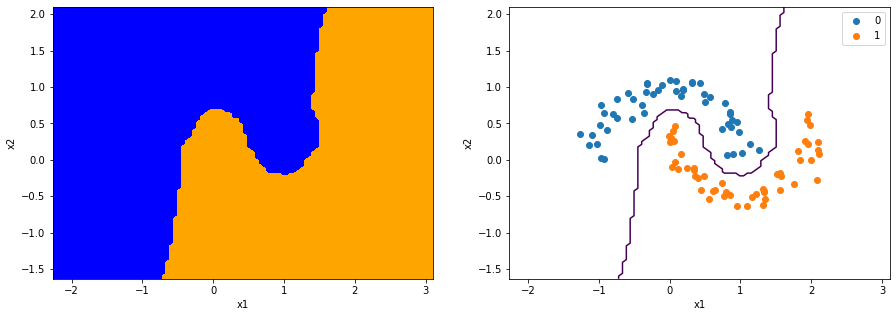

In [8]:
model.show_2dboundary()